# **Proyek Analisis Data: E-Commerce Public Dataset**

- Nama: Jessindy Tanuwijaya
- Email: tanjess676@gmail.com
- ID Dicoding: jessdytan

## **1. Menentukan Pertanyaan Bisnis**

- Bagaimana penjualan berubah dari waktu ke waktu?
- Kategori produk mana yang paling diminati pelanggan?
- Seberapa efektif strategi pembayaran yang digunakan pelanggan?
- Berapa rata-rata waktu pengiriman dan bagaimana pengaruhnya terhadap kepuasan pelanggan?
- Berapa rata-rata biaya pengiriman per transaksi?

## **2. Import Library/Packages Yang Digunakan**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## **3. Data Wrangling**

Data Wrangling adalah proses menyiapkan dan membersihkan data agar dapat digunakan dalam analisis atau pemodelan.

Dalam tahap data wrangling ini dibagi menjadi 3 tahap:
1. Gathering Data (Mengumpulkan Data) : mengumpulkan data dari berbagai sumber seperti file CSV, database, API, atau web scraping.
2. Assesing Data (Menilai Kualitas Data) : mengevaluasi data untuk menemukan inkonsistensi, data yang hilang, atau duplikasi.
3. Cleaning Data (Membersihkan Data) : memperbaiki data yang bermasalah, seperti menghapus duplikasi, mengisi nilai yang hilang, atau mengubah tipe data.

### **3.1 Gathering Data**

In [2]:
folder_path = "data/" # Path folder data

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dfs = {} # Dictionary untuk simpan dataframe

for file in csv_files:
    file_name = os.path.basename(file)  # Mendapatkan nama file
    file_key = file_name.replace(".csv", "")  # Hapus ekstensi .csv untuk jadi key dari dictionary
    dfs[file_key] = pd.read_csv(file)  # Simpan dataframe
    
    print(f"\n📂 FILE: {file_name}\n")  # Print nama file
    display(dfs[file_key].head())  # Tampilkan 5 data pertama
    print("-" * 50)   # Garis pembatas    


📂 FILE: customers_dataset.csv



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


--------------------------------------------------

📂 FILE: geolocation_dataset.csv



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


--------------------------------------------------

📂 FILE: orders_dataset.csv



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


--------------------------------------------------

📂 FILE: order_items_dataset.csv



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


--------------------------------------------------

📂 FILE: order_payments_dataset.csv



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


--------------------------------------------------

📂 FILE: order_reviews_dataset.csv



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


--------------------------------------------------

📂 FILE: products_dataset.csv



,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


--------------------------------------------------

📂 FILE: product_category_name_translation.csv



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


--------------------------------------------------

📂 FILE: sellers_dataset.csv



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


--------------------------------------------------


### **3.2 Assessing Data**

Notes:
- `info()` digunakan untuk mendapat informasi DataFrame termasuk jumlah entri, tipe data, dan jumlah nilai non-null di setiap kolom.
- `isna().sum()` digunakan untuk menghitung jumlah nilai NaN (kosong/missing values) di setiap kolom dalam DataFrame.
- `duplicated().sum()` digunakan untuk menghitung jumlah baris duplikat dalam DataFrame.
- `describe()` digunakan untuk memberikan statistik ringkasan untuk kolom numerik dalam DataFrame, seperti mean, std, min, max, dan quartiles.

#### 3.2.1 Menilai tabel customers_dataset

In [3]:
dfs["customers_dataset"].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
dfs["customers_dataset"].isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", dfs["customers_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [6]:
dfs["customers_dataset"].describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### 3.2.2 Menilai tabel geolocation_dataset

In [7]:
dfs["geolocation_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [8]:
dfs["geolocation_dataset"].isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [9]:
print("Jumlah duplikasi: ", dfs["geolocation_dataset"].duplicated().sum())

Jumlah duplikasi:  261831


In [10]:
dfs["geolocation_dataset"].describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### 3.2.3 Menilai tabel order_items_dataset

In [11]:
dfs["order_items_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
dfs["order_items_dataset"].isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", dfs["order_items_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [14]:
dfs["order_items_dataset"].describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### 3.2.4 Menilai tabel order_payments_dataset

In [15]:
dfs["order_payments_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [16]:
dfs["order_payments_dataset"].isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", dfs["order_payments_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [18]:
dfs["order_payments_dataset"].describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### 3.2.5 Menilai tabel order_reviews_dataset

In [19]:
dfs["order_reviews_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
dfs["order_reviews_dataset"].isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", dfs["order_reviews_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [22]:
dfs["order_reviews_dataset"].describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### 3.2.6 Menilai tabel orders_dataset

In [23]:
dfs["orders_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [24]:
dfs["orders_dataset"].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", dfs["orders_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [26]:
dfs["orders_dataset"].describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 3.2.7 Menilai tabel products_dataset

In [27]:
dfs["products_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
dfs["products_dataset"].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
print("Jumlah duplikasi: ", dfs["products_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [30]:
dfs["products_dataset"].describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### 3.2.8 Menilai tabel sellers_dataset

In [31]:
dfs["sellers_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
dfs["sellers_dataset"].isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", dfs["sellers_dataset"].duplicated().sum())

Jumlah duplikasi:  0


In [34]:
dfs["sellers_dataset"].describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### 3.2.9 Menilai tabel product_category_name_translation

In [35]:
dfs["product_category_name_translation"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
dfs["product_category_name_translation"].isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", dfs["product_category_name_translation"].duplicated().sum())

Jumlah duplikasi:  0


In [38]:
dfs["product_category_name_translation"].describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### **3.3 Cleaning Data**

#### 3.3.1 Tabel geolocation_dataset

Jika dilihat dari data yang disampaikan, data memang bisa menjadi duplikat dikarenakan bisa saja beberapa customer e-commerce memiliki daerah tempat tinggal yang sama

#### 3.3.2 Tabel order_items_dataset

In [39]:
# mengubah kolom order_purchase_timestamp dan order_approved_at menjadi datetime
dfs["order_items_dataset"]["shipping_limit_date"] = pd.to_datetime(dfs["order_items_dataset"]["shipping_limit_date"])

#### 3.3.3 Tabel olist_order_reviews_dataset

##### Analisis Data Review Pelanggan

Dari informasi yang diperoleh, terdapat beberapa kolom dengan nilai kosong:

- **`review_comment_title`** → 87,656 baris kosong  
- **`review_comment_message`** → 58,247 baris kosong  

Karena pelanggan mungkin tidak memberikan ulasan, kita akan **mengisi nilai kosong dengan** `"No comment"` agar data tetap bersih dan konsisten.

In [40]:
dfs["order_reviews_dataset"].fillna("No Comment", inplace=True)

Setelah mengisi, sekarang kita akan mengecek kembali nilai kosong dalam DataFrame

In [41]:
dfs["order_reviews_dataset"].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Mengubah Tipe Data

Dari informasi DataFrame yang kita lihat pada tahap Assesing Data, `review_answer_timestamp` masih memiliki tipe data object, agar analisis dapat dengan tepat dilakukan, maka kita akan mengubah tipe data nya menjadi `datetime`

In [42]:
dfs["order_reviews_dataset"]["review_answer_timestamp"] = pd.to_datetime(dfs["order_reviews_dataset"]["review_answer_timestamp"])

#### 3.3.4 Tabel orders_dataset

Mengubah Data Type yang Tidak Sesuai  

Beberapa kolom dalam dataset masih bertipe **object**, padahal seharusnya bertipe **datetime**.  
Kolom yang dikonversi:  
- `order_purchase_timestamp`  
- `order_approved_at`  
- `order_delivered_carrier_date`  
- `order_delivered_customer_date`  
- `order_estimated_delivery_date`  

Konversi ini penting untuk analisis waktu, filtering, dan visualisasi data.  
Kita akan menggunakan `pd.to_datetime()` untuk memastikan formatnya sesuai.   

In [43]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  dfs["orders_dataset"][column] = pd.to_datetime(dfs["orders_dataset"][column])

In [44]:
dfs["orders_dataset"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Nilai yang hilang bukan selalu kesalahan, tetapi bisa menunjukkan pola penting dalam data, misalnya:  
- **`Pesanan sedang dalam status 'invoiced'`** → Pesanan belum diproses sama sekali.  
- **`Pesanan sedang dalam status 'processing'`** → Pesanan sedang diproses.  
- **`Pesanan sedang dalam status 'shipped'`** → Pesanan sedang diantar, belum sampai ke customer.  
- **`Pesanan di 'canceled'`** → Bisa terjadi karena terdapat masalah logistik atau retur.

#### 3.3.5 Tabel products_dataset

Sebelum memutuskan untuk drop sebuah row dengan nilai NaN/kosong, sebaiknya hitung persentase missing value dahulu, jika terlalu kecil, lebih baik mengisi nilai tersebut

In [45]:
dfs["products_dataset"].isna().sum() / len(dfs["products_dataset"]) * 100 # Persentase missing value

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [46]:
# Isi kolom numerik dengan median
num_cols = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm","product_name_lenght", "product_description_lenght", "product_photos_qty"]
dfs["products_dataset"][num_cols] = dfs["products_dataset"][num_cols].fillna(dfs["products_dataset"][num_cols].median())

# Isi kolom kategorikal dengan mode (nilai terbanyak)
dfs["products_dataset"] = dfs["products_dataset"].assign(
    product_category_name=lambda df: df["product_category_name"].fillna(df["product_category_name"].mode()[0])
)

Dapat dinilai dari cell dibawah, sekarang sudah tidak ada lagi missing values

In [47]:
dfs["products_dataset"].isna().sum() 

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### 3.3.6 Tabel order_payments_dataset

Dalam kolom payment_type terdapat value not_defined, karena jumlahnya tidak banyak dan tidak memiliki impact terhadap analisis data, maka kita drop saja

In [48]:
dfs["order_payments_dataset"] = dfs["order_payments_dataset"][~dfs["order_payments_dataset"]["payment_type"].isin(["not_defined"])]

## **4. Exploratory Data Analysis (EDA)**

### 4.1 Mendapatkan insight domisili customer terbanyak

In [49]:
dfs["customers_dataset"].sample(5) # Tampilkan 5 data acak

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
24997,7ca700079250fbfa899bb7d098b8b108,f5c2abaea3685b82e83fe7f039ca5b99,88020,florianopolis,SC
80016,ce2420af7520a564497bd704b62bbed4,3ddc223389095845491ea42d872a09dd,4473,sao paulo,SP
64033,26d65fc97a624b5c2599d93eccbe58b3,ba67e0c03c82d74fb7751e121355e710,4412,sao paulo,SP
53652,0306418261763252d46c47f9251e76e2,470adde7d91f2694e38b79cb314252fb,88351,brusque,SC
99096,4f928b8251b656808a61dc113d912888,96cdc1ea3aa898de11cf8823cf6e1524,28930,arraial do cabo,RJ


In [50]:
dfs["customers_dataset"].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False) # Jumlah customer berdasarkan kota

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

Dari sini dapat dikatakan domisili customer paling banyak berada pada kota `Sao Paulo`

In [51]:
dfs["customers_dataset"].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False) # Jumlah customer berdasarkan state

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### 4.2 Mendapatkan insight ketepatan estimasi pengiriman

In [52]:
dfs["orders_dataset"].sample(5) # Tampilkan 5 data acak

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26745,b6bfbeea1b933b34c91ec0b216a50347,1ece07e2253ede2f81d2c3c7342232a8,delivered,2017-10-11 16:58:39,2017-10-11 17:14:13,2017-10-13 18:12:11,2017-10-20 18:53:45,2017-11-07
30340,e5cee28542e829bfd8e8ab719c386311,9ba0b4f4ee665808d39fe864b491bf15,delivered,2018-03-17 19:56:53,2018-03-17 20:10:24,2018-03-19 18:03:12,2018-04-03 15:33:00,2018-04-16
14519,d301e4651c2fb09b847fce76b3f73885,5bb539b873ec166dc8588ab1da327c03,delivered,2018-03-06 11:11:12,2018-03-06 11:49:52,2018-03-07 21:04:45,2018-03-08 13:04:58,2018-04-02
56894,884082cba8cfd079bc60c7b66d252aa3,a837d50248732f4bc3d0fb03d01fe9c5,delivered,2018-06-29 17:19:58,2018-06-29 17:35:12,2018-07-03 15:28:00,2018-07-04 19:34:46,2018-07-16
96745,db0f06a2eb744ec1600b4c90f1df5ded,9c96e21ca1d4fed3cd902dd77b9fca5c,delivered,2017-06-05 08:57:55,2017-06-06 13:23:15,2017-06-08 14:19:16,2017-06-27 14:45:46,2017-07-06


In [53]:
# Menghitung ketepatan waktu pengiriman
delivery_delay_time = dfs["orders_dataset"]["order_delivered_customer_date"] - dfs["orders_dataset"]["order_estimated_delivery_date"]
delivery_delay_time = delivery_delay_time.apply(lambda x: x.total_seconds())
dfs["orders_dataset"]["delivery_delay_time"] = round(delivery_delay_time/86400)

In [54]:
dfs["orders_dataset"].describe(include="all") # Statistik deskriptif

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,-11.008655
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-146.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,-16.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,-12.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,-6.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,189.000000


Berdasarkan analisis di atas terhadap estimasi pengiriman:
- Jika hasil **positif**, berarti **pesanan terlambat**.
- Jika hasil **negatif atau nol**, berarti **pesanan tepat waktu atau lebih cepat**.
- Rata-rata estimasi lebih cepat 11 hari dari perkiraan sampai ke customer

### 4.3 Mendapatkan insight metode pembayaran terbanyak

In [55]:
dfs["order_payments_dataset"].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False) # Jumlah order berdasarkan metode pembayaran

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

In [56]:
dfs["order_payments_dataset"].describe(include="all") # Statistik deskriptif

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103883,103883.000000,103883,103883.000000,103883.000000
unique,99437,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092681,NaN,2.853402,154.104831
std,NaN,0.706594,NaN,2.687071,217.495628
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.800000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


### 4.4 Menggabungkan tabel customer dan orders

In [57]:
# Menggabungkan data order dan customer
orders_customers_df = pd.merge(
    left=dfs["orders_dataset"],
    right=dfs["customers_dataset"],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-17.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-9.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [58]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False) # Jumlah order berdasarkan status

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### 4.5 Menggabungkan tabel products dan category dalam bahasa Inggris

In [59]:
# Menggabungkan data product dan nama kategori dalam bahasa Inggris
product_english_df = pd.merge(
    left=dfs["products_dataset"],
    right=dfs["product_category_name_translation"],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
# Tampilkan 5 data pertama
product_english_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### 4.6 Mendapatkan insight tabel products

In [60]:
dfs["products_dataset"].sample(10) # Tampilkan 10 data acak

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3571,c58fc7dab2a718f8aa5522dd57c2b18d,cama_mesa_banho,58.0,396.0,1.0,1900.0,45.0,25.0,35.0
27609,39efe0f8c8ddad17dd5430c500fb0b0f,moveis_decoracao,55.0,564.0,1.0,5400.0,75.0,25.0,25.0
17204,07abca077ba83f4feab7d89db0b74df1,cama_mesa_banho,56.0,345.0,1.0,20850.0,50.0,50.0,50.0
13142,49f19939bc5c8639e06c36d3bf01ee98,brinquedos,45.0,842.0,2.0,213.0,16.0,13.0,14.0
27658,091aa6199199f1ccbd272d06892322de,telefonia,54.0,896.0,4.0,150.0,19.0,4.0,11.0
9394,b3f46a64b6f6d0091c2001f5a82cc927,automotivo,38.0,865.0,1.0,150.0,16.0,15.0,14.0
13416,e00c537178247f52d3e9fe9612a8b518,moveis_decoracao,54.0,508.0,2.0,2900.0,35.0,30.0,35.0
27022,f39d173b39667dbc8a170145b8035ae2,ferramentas_jardim,58.0,1937.0,4.0,1550.0,29.0,7.0,21.0
29721,98de98bcd25120495ad55c516a11a531,malas_acessorios,60.0,742.0,2.0,1400.0,50.0,50.0,20.0
17769,b17a6664cea6ac6c23ff388f5a67c973,beleza_saude,50.0,212.0,2.0,333.0,29.0,6.0,17.0


In [61]:
# Gabungkan data order_items dan product
orders_products_df = pd.merge(
    left=dfs["order_items_dataset"],
    right=product_english_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
) 
# Tampilkan 5 data pertama
orders_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [62]:
# Jumlah produk, harga minimum, dan harga maksimum berdasarkan kategori produk
orders_products_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price":  ["min", "max"]
}) 

product_id  price         
                             nunique    min      max
product_category_name                               
agro_industria_e_comercio         74  12.99  2990.00
alimentos                         82   9.99   274.99
alimentos_bebidas                104   6.50   699.90
artes                             55   3.50  6499.00
artes_e_artesanato                19   9.80   289.49
...                              ...    ...      ...
sinalizacao_e_seguranca           93   4.50   740.00
tablets_impressao_imagem           9  14.90   889.99
telefonia                       1134   5.00  2428.00
telefonia_fixa                   116   6.00  1790.00
utilidades_domesticas           2335   3.06  6735.00

[73 rows x 3 columns]

### 4.7 Menggabungkan tabel products dan seller

In [63]:
# Gabungkan data order_items, product, dan seller
sellers_df = pd.merge(
    left=orders_products_df,
    right=dfs["sellers_dataset"],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
) 
# Tampilkan 5 data pertama
sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


In [64]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"],
    "freight_value": ["min", "max"]
})

order_id  price          freight_value        
                               nunique    min      max           min     max
product_category_name_english                                               
agro_industry_and_commerce         182  12.99  2990.00          7.39  194.55
air_conditioning                   253  10.90  1599.00          6.58  115.43
art                                202   3.50  6499.00          7.39  227.66
arts_and_craftmanship               23   9.80   289.49          7.39   68.72
audio                              350  14.90   598.99          4.25   52.67
...                                ...    ...      ...           ...     ...
stationery                        2311   2.29  1693.00          0.04  222.38
tablets_printing_image              79  14.90   889.99          1.71   34.49
telephony                         4199   5.00  2428.00          0.01  121.22
toys                              3886   4.90  1699.99          0.01  193.76
watches_gifts                     5624   8.99  3999.90          0.00  209.63

[71 rows x 5 columns]

### 4.8 Mendapatkan insight waktu pengiriman

In [65]:
delivery_df = dfs["orders_dataset"].copy()

# Menghitung lama pengiriman
delivery_df["delivery_time"] = (delivery_df["order_delivered_customer_date"] - delivery_df["order_purchase_timestamp"]).dt.days

delivery_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay_time,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-7.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-5.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-17.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-9.0,2.0


### 4.9 Grouping Customer Berdasarkan Payment Values

In [66]:
# Membagi data menjadi 4 kelompok
customer_group_df = pd.qcut(dfs["order_payments_dataset"]['payment_value'], q=4, labels=["Bronze", "Silver", "Gold", "Platinum"]) 

# Menambahkan kolom baru
dfs["order_payments_dataset"] = dfs["order_payments_dataset"].assign(payment_group=customer_group_df) 

dfs["order_payments_dataset"].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,payment_group
13915,7eadf6b27280d4bfed6c3e1781b11247,1,voucher,1,36.84,Bronze
16073,3f27ed06b2513b7e6cad3d148e049bac,1,credit_card,2,144.50,Gold
83030,9eddcb9c8cbfd8719bbc6b147ef32735,1,credit_card,2,48.25,Bronze
30490,519a63cb3ea1d2c4b1364552eacb6b29,1,credit_card,2,148.22,Gold
102903,1e9bf802b8192eb97af61fd92b586471,1,credit_card,1,38.68,Bronze
22261,30e7e338d14fc95a5aac82ae9cdcf2c6,1,credit_card,10,115.15,Gold
23351,b4e9e179195a7cee910bf458c5b6e01e,1,credit_card,1,99.67,Silver
23565,7fb9240a1a18bc95290744b4277a0244,1,credit_card,1,41.34,Bronze
42798,6a92e66b9d3bd75efeb50c6494ede745,1,credit_card,2,64.13,Silver
44135,a57a5bbb57b15b49050bc6a58a2f240e,1,credit_card,1,48.99,Bronze


## **5. Visualization & Explanatory Analysis**

### 5.1. Bagaimana penjualan berubah dari waktu ke waktu?

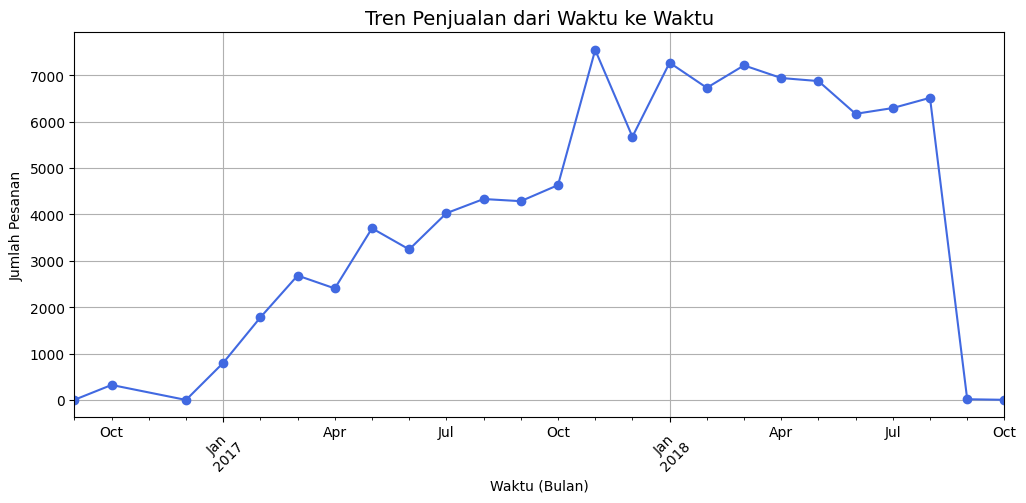

In [67]:
# Menghitung penjualan per bulan
dfs['orders_dataset']['order_purchase_timestamp'] = dfs['orders_dataset']['order_purchase_timestamp'].dt.to_period('M')
sales_trend = dfs['orders_dataset'].groupby('order_purchase_timestamp').size()

# Plot tren penjualan
plt.figure(figsize=(12, 5))
sales_trend.plot(marker='o', linestyle='-', color='royalblue')
plt.title("Tren Penjualan dari Waktu ke Waktu", fontsize=14)
plt.xlabel("Waktu (Bulan)")
plt.ylabel("Jumlah Pesanan")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Kesimpulan:
- Puncak penjualan adalah pada rentang bulan November - Desember
- Penuruna penjualan terbesar adalah pada rentang bulan Agustus - September

### 5.2. Kategori produk mana yang paling diminati pelanggan?

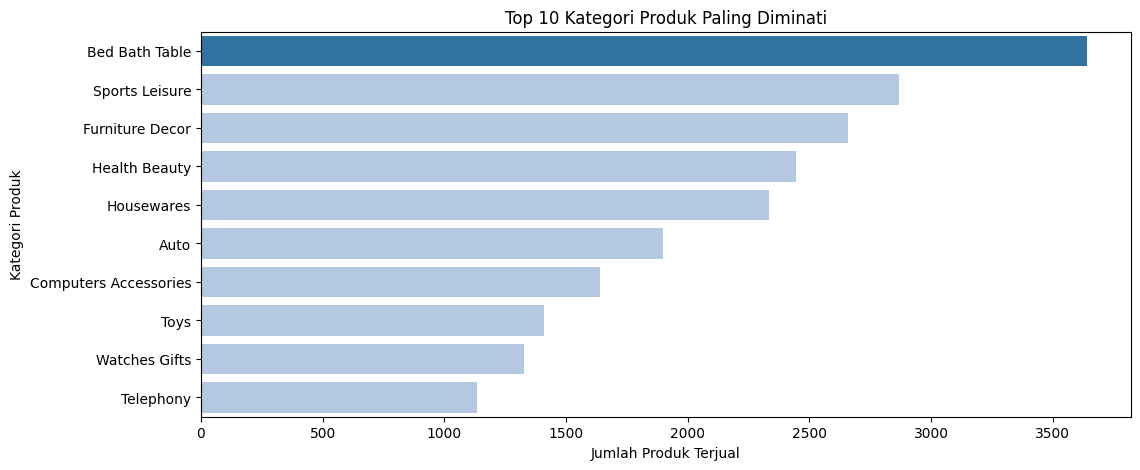

In [68]:
# Mendapatkan 10 kategori produk paling populer
popular_categories = product_english_df['product_category_name_english'].value_counts().head(10)

# Mengubah format nama kategori
popular_categories.index = popular_categories.index.str.replace('_', ' ').str.title()

# Buat daftar warna: warna pertama biru cerah, sisanya biru pudar
colors = ['#1f77b4'] + ['#aec7e8'] * (len(popular_categories) - 1)  # Warna pertama biru tegas, sisanya biru pudar

# Visualisasi dengan barplot
plt.figure(figsize=(12, 5))
sns.barplot(x=popular_categories.values, y=popular_categories.index, hue=popular_categories.index, palette=colors)
plt.title("Top 10 Kategori Produk Paling Diminati")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.show()


Kesimpulan nya : Produk dengan kategori `Bed Bath Table` merupakan yang terlaris (paling banyak dibeli)

### 5.3. Seberapa efektif strategi pembayaran yang digunakan pelanggan?

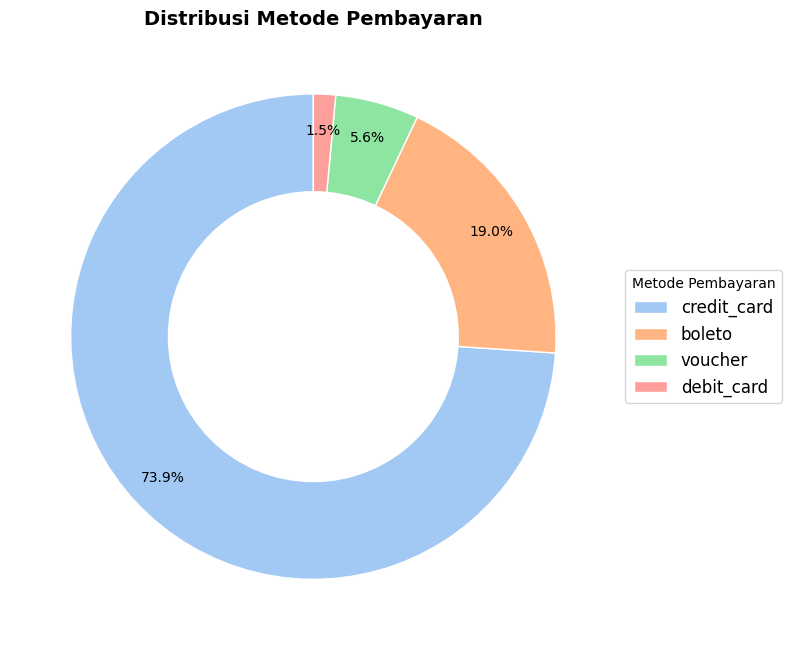

In [69]:
# Mendapatkan metode pembayaran terbanyak
payment_counts = dfs['order_payments_dataset']['payment_type'].value_counts()

colors = sns.color_palette("pastel", len(payment_counts)) # Warna

# Ukuran plot
fig, ax = plt.subplots(figsize=(8, 8)) 

# Pie chart
wedges, texts, autotexts = ax.pie(
    x=payment_counts.values, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90,
    pctdistance=0.85, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
) 

centre_circle = plt.Circle((0,0),0.60,fc='white') # Lingkaran di tengah pie chart
fig = plt.gcf() # Mendapatkan figure
fig.gca().add_artist(centre_circle) # Menambahkan lingkaran ke figure

# Legend
ax.legend(
    wedges, 
    payment_counts.index, 
    title="Metode Pembayaran", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5),
    fontsize=12
) 

# Judul
plt.title("Distribusi Metode Pembayaran", fontsize=14, fontweight='bold') 

plt.tight_layout() # Layout
plt.show() # Tampilkan plot

Kesimpulan:
- Transaksi pembelian pelanggan paling banyak menggunakan `Credit Card`
- Visualisasi ini memberikan insight pada perusahaan untuk mengadakan banyak kerja sama dengan perusahaan kartu kredit agar menarik banyak pelanggan

### 5.4. Berapa rata-rata waktu pengiriman dan bagaimana pengaruhnya terhadap kepuasan pelanggan?

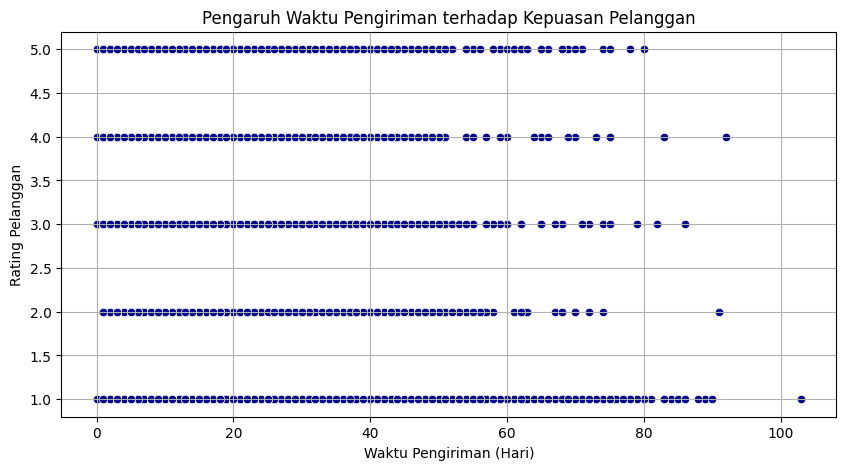

In [70]:
# Gabungkan data order dan review
merged_reviews = delivery_df.merge(dfs['order_reviews_dataset'], on='order_id', how='left') 

# Hanya ambil data dengan waktu pengiriman kurang dari 60 hari
merged_reviews = merged_reviews[merged_reviews["delivery_delay_time"] < 60] 

# Plot scatter plot
plt.figure(figsize=(10, 5))

sns.scatterplot(
    data=merged_reviews, 
    x='delivery_time', 
    y='review_score', 
    color='darkblue'
)

plt.title("Pengaruh Waktu Pengiriman terhadap Kepuasan Pelanggan")
plt.xlabel("Waktu Pengiriman (Hari)")
plt.ylabel("Rating Pelanggan")
plt.grid(True)
plt.show()

Kesimpulan:
- Sebagian besar pesanan dikirim dalam ≤40 hari, tetapi ada beberapa yang mencapai >60 hari hingga 100 hari.
- Rating 5 tetap dominan, namun keterlambatan pengiriman cenderung meningkatkan jumlah rating rendah (1 & 2).
- Pengiriman yang lebih cepat dapat meningkatkan kepuasan pelanggan, terutama dengan mengurangi keterlambatan ekstrem. 

### 5.5. Berapa rata-rata biaya pengiriman per transaksi?

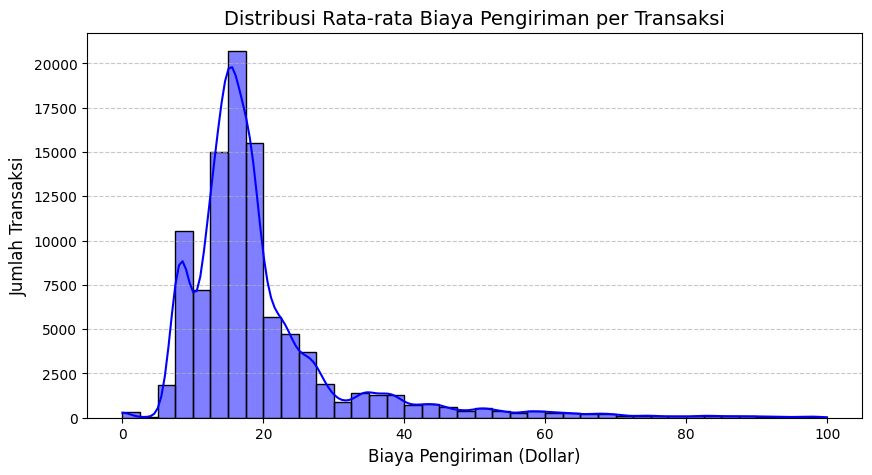

In [71]:
avg_shipping_cost = dfs["order_items_dataset"].groupby('order_id')['freight_value'].mean()
avg_shipping_cost = avg_shipping_cost[avg_shipping_cost < 100]

# Membuat plot
plt.figure(figsize=(10, 5))
sns.histplot(avg_shipping_cost, bins=40, kde=True, color='blue', edgecolor='black')

# Menambahkan judul dan label
plt.title("Distribusi Rata-rata Biaya Pengiriman per Transaksi", fontsize=14)
plt.xlabel("Biaya Pengiriman (Dollar)", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)

# Menambahkan grid agar lebih jelas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

Kesimpulan:
- Distribusi biaya pengiriman per transaksi menunjukkan pola yang tidak simetris (right-skewed), dengan mayoritas transaksi memiliki biaya pengiriman di kisaran 10-25 dollar